(1797, 64)


<Figure size 640x480 with 0 Axes>

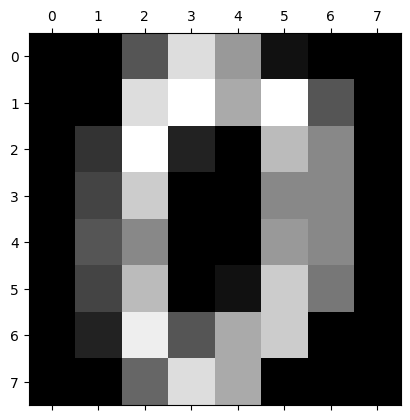

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree
import pickle as pkl


# Carregar o dataset load_digits (MINST)
digits = load_digits()
print(digits.data.shape)

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [2]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [3]:
#Cria os conjuntos X e y
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
np.max(X_train[100])

np.float64(16.0)

In [5]:
# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='best')  #0.8416666666666667
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='best') #0.8888888888888888
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', splitter='random') #0.9083333333333333
# Treinar a Decision Tree
clf.fit(X_train, y_train)
# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)
# Imprimir a precisão da Decision Tree
print(f"Arvore criada: Precisão: {clf.score(X_test, y_test):.2%}, Profundidade: {clf.tree_.max_depth}")


Arvore criada: Precisão: 90.83%, Profundidade: 12


[Text(0.5365306712962963, 0.9615384615384616, 'x[42] <= 9.04\nentropy = 3.321\nsamples = 1437\nvalue = [145, 154, 144, 149, 135, 135, 146, 145, 144, 140]'),
 Text(0.2862413194444444, 0.8846153846153846, 'x[26] <= 7.467\nentropy = 3.008\nsamples = 849\nvalue = [14.0, 108.0, 110.0, 143.0, 43.0, 129.0, 5.0, 111.0\n47.0, 139.0]'),
 Text(0.41138599537037035, 0.9230769230769231, 'True  '),
 Text(0.13194444444444445, 0.8076923076923077, 'x[43] <= 2.709\nentropy = 2.462\nsamples = 430\nvalue = [3, 45, 103, 135, 0, 6, 3, 81, 10, 44]'),
 Text(0.06770833333333333, 0.7307692307692307, 'x[30] <= 0.793\nentropy = 1.492\nsamples = 188\nvalue = [3.0, 11.0, 7.0, 121.0, 0.0, 1.0, 0.0, 1.0, 0.0, 44.0]'),
 Text(0.02546296296296296, 0.6538461538461539, 'x[10] <= 1.373\nentropy = 0.779\nsamples = 131\nvalue = [0, 8, 3, 114, 0, 1, 0, 0, 0, 5]'),
 Text(0.009259259259259259, 0.5769230769230769, 'x[4] <= 14.63\nentropy = 0.592\nsamples = 7\nvalue = [0, 6, 0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.004629629629629629, 0

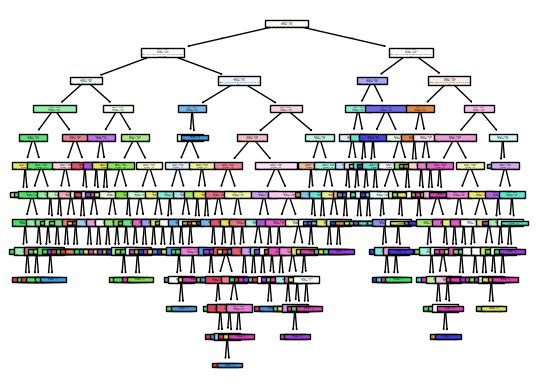

In [6]:
tree.plot_tree(clf, filled=True)

In [7]:
with open('../models/modelo.pkl', 'wb') as f:
    # Pickle the clf model using the highest protocol available.
    pkl.dump(clf, f, pkl.HIGHEST_PROTOCOL)